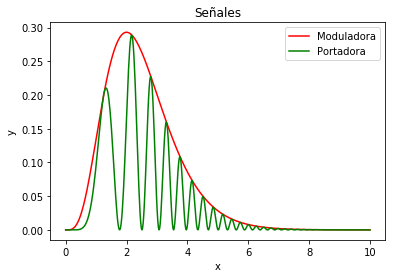

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,500)

y1 = (x**4)*np.exp(-2*x)
y2 = ((x**2)*np.exp(-x)*np.sin(x**2))**2

plt.plot(x,y1,'r-',label='Moduladora')
plt.plot(x,y2,'g-',label='Portadora')
plt.title('Señales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

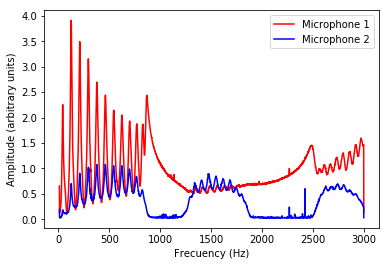

In [2]:
frecuency, mic1, mic2 = np.loadtxt('./files/microphones.txt', unpack=True)

plt.figure()
plt.plot(frecuency, mic1, 'r-', frecuency, mic2, 'b-')
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Amplitude (arbitrary units)')
plt.legend(['Microphone 1', 'Microphone 2'])
plt.show()

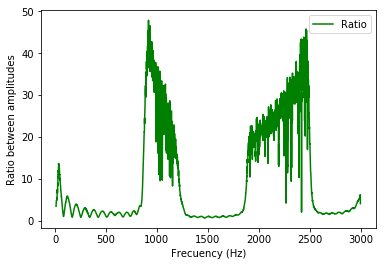

In [3]:
plt.figure()
plt.plot(frecuency, mic1/mic2, 'g-', label='Ratio')
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Ratio between amplitudes')
plt.legend(loc='best')
plt.show()

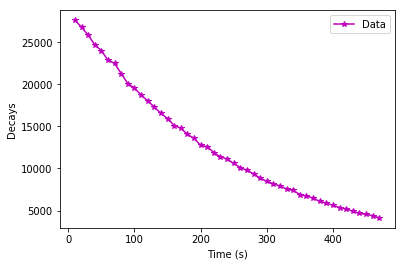

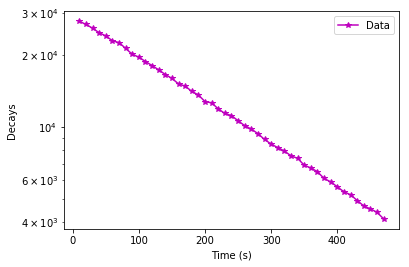

In [4]:
decays, time = np.loadtxt('./files/Ba137.txt', unpack=True)

plt.figure()
plt.plot(time, decays, 'm-*', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('Decays')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.semilogy(time, decays, 'm-*', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('Decays')
plt.legend(loc='best')
plt.show()

Si tengo la formula $N = N_{0}e^{-\lambda t}$, tomando logaritmo a ambos lados me queda una lineal, sacando la pendiente del gráfico de arriba con un fiteo lineal tengo el parametro $\lambda$; y con la relacion $t_{\frac{1}{2}}$ = $\frac{ln 2}{\lambda}$ saco la vida media de $Ba^{137}$

In [5]:
slope, intercept = np.polyfit(time, np.log(decays), 1)
print(slope)

thf = -np.log(2)/slope #time in seconds
print('Half life of Ba137 in minutes:', thf/60)

-0.0041431747554
Half life of Ba137 in minutes: 2.78830937418


In [6]:
M = np.array([[2, -1, 0, 0],[-1, 2, -1, 0],[0, -1, 2, -1],[0, 0, -1, 2]])

angularFrequencies, eigenVectors = np.linalg.eig(M)
a = np.sort(angularFrequencies)
print(a)

[ 0.38196601  1.38196601  2.61803399  3.61803399]


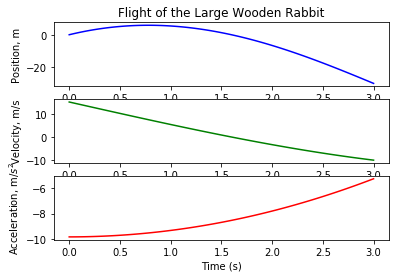

In [7]:
#Plot the trajectory of a free falling object.
#Create a single plot that shows separate graphs of position, velocity,
#and acceleration for an object in free-fall. Your plot should have a 
#single horizontal time axis and separate stacked graphs showing position,
#velocity, and acceleration each on their own vertical axis. (See figure
#3.) The online matplotlib gallery will probably be helpful! Print the
#graph, with your name in the title

from scipy.integrate import odeint

#Time array for the Large Wooden Rabit's (LWR) position, velocity, and acceleration.
tmin = 0;
tmax = 3;
N = 100;

time = np.linspace(tmin, tmax, N);

#Initial conditions array.
initialPositionLWR = 0.0;
initialVelocityLWR = 15.0;

#Earth's gravitational constant in [m/s^2].
g = 9.81

initialConditionsLWR = [initialPositionLWR, initialVelocityLWR, -g];

#The LWR's equations of motions.
#A callable function must be declared in order to use the 'odeint' function.
def LWREquationsOfMotion(y,t):
    g0 = y[1] + y[2]*t #position_derivative = y[1]
    g1 = y[2] #velocity_derivative = y[2]
    return np.array([g0,g1,t]) #array([position_derivative,velocity_derivative])

#Solve the LWR's differential equations of motion.
LWRDynamics = odeint(LWREquationsOfMotion, initialConditionsLWR, time)


#Obtain the position, velocity, and acceleration 100x1 arrays from the LWRDynamics 100x3 array.
position_solution = LWRDynamics[:,0];
velocity_solution = LWRDynamics[:,1];
acceleration_solution = LWRDynamics[:,2];

#Plot formatting for the LWR's position.
plt.subplot(3, 1, 1)
plt.plot(time, position_solution, 'b-')
plt.title('Flight of the Large Wooden Rabbit')
plt.ylabel('Position, m')

#Plot formatting for the LWR's velocity.
plt.subplot(3, 1, 2)
plt.plot(time, velocity_solution, 'g-')
plt.ylabel('Velocity, m/s')


#Plot formatting for the LWR's acceleration.
plt.subplot(3, 1, 3)
plt.plot(time, acceleration_solution, 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration, m/$s^{2}$')

plt.show()


In [8]:
l = [x**2 for x in range(10,21)]
print(l)

[100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


In [9]:
def fibo():
    N = int(input('Limite superior: '))
    if (N > 2):
        a, b = 0, 1 #Matematicamente correcto que f(0) = 0
        print(a)
        print(b)
        i = N # Esto porque no esta bueno modificar un parametro de entrada
        while i > 2:
            c = a + b
            print(c)
            a = b
            b = c
            i = i - 1
    else:
        print('N debe ser mayor a 2')

fibo()

Limite superior: 4
0
1
1
2


Altura inicial: 5
Velocidad inicial: 6


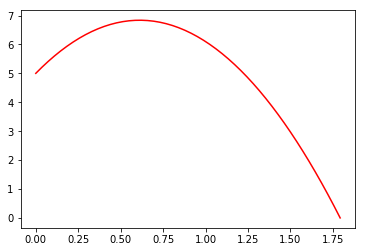

Tiempo (s)   |   Altura (m)
----------   |   ----------
0.000000     |   5.000000
0.036601     |   5.213042
0.073202     |   5.412956
0.109803     |   5.599741
0.146404     |   5.773398
0.183005     |   5.933927
0.219606     |   6.081326
0.256208     |   6.215598
0.292809     |   6.336741
0.329410     |   6.444755
0.366011     |   6.539642
0.402612     |   6.621399
0.439213     |   6.690028
0.475814     |   6.745529
0.512415     |   6.787901
0.549016     |   6.817145
0.585617     |   6.833260
0.622218     |   6.836247
0.658819     |   6.826106
0.695420     |   6.802836
0.732022     |   6.766437
0.768623     |   6.716910
0.805224     |   6.654255
0.841825     |   6.578471
0.878426     |   6.489558
0.915027     |   6.387518
0.951628     |   6.272348
0.988229     |   6.144051
1.024830     |   6.002624
1.061431     |   5.848070
1.098032     |   5.680387
1.134633     |   5.499575
1.171234     |   5.305635
1.207836     |   5.098567
1.244437     |   4.878370
1.281038     |   4.645044
1.317639

In [10]:
g = 9.8

y0 = float(input('Altura inicial: '))
v0 = float(input('Velocidad inicial: '))

cerox = (v0 + np.sqrt(v0**2 + 2*g*y0))/g # Tiempo donde toca el piso nuevamente

t = np.linspace(0,cerox,50)
y = y0 + v0*t - 0.5*g*t**2

plt.plot(t,y,'r-')
plt.show()

#file = np.savetxt('./files/caidalibre.txt',list(zip(t,y)),delimiter='\t',fmt='%.4g')

print('{:s}   |   {:s}'.format('Tiempo (s)','Altura (m)'))
print('{:s}   |   {:s}'.format('----------','----------'))

for j in range(len(t)):
    print('{:4f}     |   {:4f}'.format(t[j],y[j]))

In [11]:
# The energy levels for a quantum particle in a three-dimensional rectangular 
# box of dimensions {L1, L2, and L3} are given by 
#
# E(n1,n2,n3) = ( ((h/2π)**2)*(π**2)/(2*m) ) ( (n1/L1)**2 + (n2/L2)**2 + (n3/L3)**2 )
#
#where the n’s are integers greater than or equal to one. Write a program that will calculate, and list in order of increasing energy, the
#values of the n’s for the 10 lowest different energy levels, given a box
#for which L2 = 2*L1 and L3 = 4*L1.

"""
	This is the Python program solution for exercise 3 of chapter 1.
"""

# The program will calculate the energy of the confined particle for an indefinite mass 'm' and box dimension 'L1'.
# If values for these parameters are provided, we must take the energy result and divide it by 1/(m * L1**2).

import numpy;

# Planck's constant is 6.62e-34 J/s.
h = 6.62e-34;

# Up to what max integer value do we want to explore the range of energy levels.
# Without including this very integer.
Nmax = 5;

# Initialize the list of integer arrays.
ListOfIntegerTuplesAndEnergy = [];

# The function QuantumEnergyParticleInBox calculates for L2 = 2*L1 and L3 = 4*L1 the particle's free energy levels.
def QuantumEnergyParticleInBox(integerTuple):
  E = ( ((h/(2*np.pi))**2) * (np.pi**2)/(2) ) * ( (integerTuple[0])**2 + ((integerTuple[1])**2)/4 + ((integerTuple[2])**2)/16 )
  return E

# Form an array of integer arrays [i,j,k] and their corresponding energies.
for i in range(1, Nmax) :
	for j in range(1, Nmax) :
		for k in range(1, Nmax) :
			ListOfIntegerTuplesAndEnergy.append( [[i, j, k], QuantumEnergyParticleInBox( [i,j,k] )] )

# Sort the energy levels and select the first 10 levels of energy. Permutations are not important.
# Use the append number to create the list. A more efficient sort should be used. Bubble sort has 
# a worst case performance of O(n**2), n is the size of the list. I know it sucks, but I can implement a better
# sort algorithm later.
def bubbleSortComplex(List):
	for k in range(0, int((len(List)/2) - 1)):	#Size of this double list is 128, but each entry of the indices can only go as far as 64.
		for i in range(0, int((len(List)/2) - 1 )):
			temp = List[i][1];	
			if	List[i][1] > List[i+1][1]:
				temp = List[i][1];
				List[i][1] = List[i+1][1];
				List[i+1][1] = temp;
	return List

sortedEnergyArray = bubbleSortComplex(ListOfIntegerTuplesAndEnergy);

# This is the list of the degenerate levels of energy. Only the 10 highest energies are printed. Only print up to [3,2,4].
# Is there a less manual way of doing this? That is to algorithmically specify that print outs should be only up to [3,2,4]. This is element 40

print("The ten first energy levels with their respective degeneracies are: \n")

for i in range(0,43) :
    print(sortedEnergyArray[i])

The ten first energy levels with their respective degeneracies are: 

[[1, 1, 1], 7.189940625000001e-68]
[[1, 1, 2], 8.217075000000001e-68]
[[1, 1, 3], 9.928965625000001e-68]
[[1, 1, 4], 1.1298478125000002e-67]
[[1, 2, 1], 1.2325612500000001e-67]
[[1, 2, 2], 1.2325612500000001e-67]
[[1, 2, 3], 1.4037503125000002e-67]
[[1, 2, 4], 1.6434150000000002e-67]
[[1, 3, 1], 1.8146040625000004e-67]
[[1, 3, 2], 1.9173175000000004e-67]
[[1, 3, 3], 2.0885065625000003e-67]
[[1, 3, 4], 2.3281712500000003e-67]
[[1, 4, 1], 2.3624090625000002e-67]
[[1, 4, 2], 2.4651225000000003e-67]
[[1, 4, 3], 2.6363115625000005e-67]
[[1, 4, 4], 2.7732628125000004e-67]
[[2, 1, 1], 2.7732628125000004e-67]
[[2, 1, 2], 2.8759762500000005e-67]
[[2, 1, 3], 2.8759762500000005e-67]
[[2, 1, 4], 2.8759762500000005e-67]
[[2, 2, 1], 3.0471653125000007e-67]
[[2, 2, 2], 3.0471653125000007e-67]
[[2, 2, 3], 3.2868300000000003e-67]
[[2, 2, 4], 3.2868300000000003e-67]
[[2, 3, 1], 3.4580190625e-67]
[[2, 3, 2], 3.5607325e-67]
[[2, 3, 3], 

Rango: 6
Cantidad de puntos: 100


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


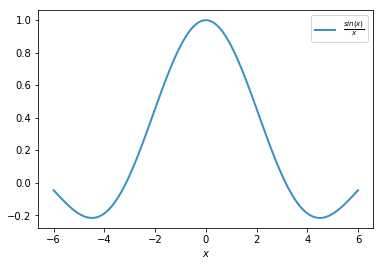

In [12]:
def plotSinc(): # Variacion del ejercicio
    x = float(input('Rango: '))
    if (x == 0):
        print('El rango debe ser mayor a 0')
        
    p = float(input('Cantidad de puntos: '))
    if (p == 0):
        print('La cantidad de puntos debe ser mayor a 0')

    xx = np.linspace(-x,x,p)
    sinc = np.sin(xx) / xx
    plt.plot(xx,sinc,color='#3B91BF',linewidth=2.0,label=r'$\frac{sin(x)}{x}$')
    plt.xlabel(r'$x$')
    plt.legend(loc='best')
    plt.show()

plotSinc()

In [13]:
def trian(N):
    s = N*(N+1)/2 # Uso la formula de Gauss aca (es trampa esto?)
    print(s)
        
trian(4)

10.0


In [14]:
def isPrime(N):
    for j in range(2,N):
        if (N % j == 0):
            print('The number is not prime')
            return
    print('The number is prime')

isPrime(104729)

The number is prime


In [15]:
#file = np.savetxt('./files/caidalibre.txt',list(zip(t,y)),delimiter='\t',fmt='%.4g')


# Ask for what number's multiplication table the user wishes to create.
DesiredMultiplicationTableNumber = int(input('What is the multiplication table you want to generate?: '));

# Ask for the file's name.
MultiplicationTableFileName = input('What is the name of the file you want to generate?: ');
MultiplicationTableFileName = './files/' + str(MultiplicationTableFileName);

MultiplicationTableFileHandle = open(MultiplicationTableFileName, 'w');

# Writing the lines of the multiplication table. Using a 'with' statement.
# No working when using the << with open('MultiplicationTableFileName', 'w') as MultiplicationTableFileHandle : >>
for i in range(1, DesiredMultiplicationTableNumber + 1):
    for j in range(1, DesiredMultiplicationTableNumber + 1):
        new_str = str(i) + ' x ' + str(j) + ' = ' + str(i*j) + '\n';
        MultiplicationTableFileHandle.write(new_str)

MultiplicationTableFileHandle.close()
		
print('File {:s} is saved.'.format(MultiplicationTableFileName))

What is the multiplication table you want to generate?: 5
What is the name of the file you want to generate?: f
File ./files/f is saved.


In [16]:
# Write a program that takes a multi-digit integer and prints out its
# digits in English. Bonus point if the program takes care of ones/
# tens/hundreds/thousands properly.

"""
	This is the Python program solution for exercise 8 of chapter 1.
"""

# First we will check the pattern of the number expression, that is how many digits it has.
# From there we determine what dictionary of English numerals we should be using.
import numpy as np;

# Ask for a number in Python.
number =  input("Please enter a positive integer between 0 and 999999: ");

# We need to get the digits.
numberToString = str(number);
arrayOfDigits = np.array([int(i) for i in numberToString]);			

# We need to translate each digit to its respective ordinal number.
# Use the following dictionaries to spell out English numerals.
# Dictionary of units.
dictionaryOfUnits = { 0 : 'zero', 1 : 'one', 2 : 'two', 3 : 'three', 4 : 'four', 5 : 'five', 6 : 'six', 7 : 'seven', 8 : 'eight', 9 : 'nine' };

# Dictionary of teens. No pun intended.
dictionaryOfTeens = { 1 : 'eleven', 2 : 'twelve', 3 : 'thirteen', 4 : 'fourteen', 5 : 'fifteen', 6 : 'sixteen', 7 : 'seventeen', 
					  8 : 'eighteen', 9 : 'nineteen' };

# Dictionary of tenths.
dictionaryOfTens = { 1 : 'ten', 2 : 'twenty', 3 : 'thirty', 4 : 'forty', 5 : 'fifty', 6 : 'sixty', 7 : 'seventy', 8 : 'eighty', 9 : 'ninety'};


# Initialize string that will contain the number's English numeral.
numberInEnglishNumeralForm = '';
		   

# This is how you access an element of a dictionary: 'dictionaryOfTenths[num]'
# Maybe you can use modular arithmetic to solve the problem.

# Do a case for each of the digits, up to 6 digits are possible.
# Can you make this function smaller and less complex: more elegant?

def changeNumberToEnglishNumerals(arrayOfDigits):
	# Prints numerals for units.
	if ( len(arrayOfDigits) == 1 ):
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]];
	
	# Prints numerals for numbers of the form 1x.
	elif ( len(arrayOfDigits) == 2 ) and ( arrayOfDigits[0] == 1 ) and ( arrayOfDigits[1] != 0 ):
		numberInEnglishNumeralForm = dictionaryOfTeens[arrayOfDigits[1]]; 
	
	# Prints numerals for multiples of ten.
	elif ( len(arrayOfDigits) == 2 ) and ( arrayOfDigits[1] == 0 ):
		numberInEnglishNumeralForm = dictionaryOfTens[arrayOfDigits[1]];
	
	# Prints numerals for two digits number besides -teens and multiples of ten.
	elif ( len(arrayOfDigits) == 2 ) and ( arrayOfDigits[1] != 0 ):
		numberInEnglishNumeralForm = dictionaryOfTens[arrayOfDigits[0]] + '-' + dictionaryOfUnits[arrayOfDigits[1]];		
		
	# Prints numerals for multiples of hundred.
	elif ( len(arrayOfDigits) == 3 ):
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' hundred ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0] ) );
		
	# Prints numerals for multiples of thousand.
	elif ( len(arrayOfDigits) == 4 ):
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0] ) );
		
	# Prints numerals for tens of thousands.
	elif ( len(arrayOfDigits) == 5 ) and ( arrayOfDigits[0] == 1 ) and ( arrayOfDigits[1] != 0 ):
		numberInEnglishNumeralForm = dictionaryOfTeens[arrayOfDigits[1]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0,1] ) );
	
	elif ( len(arrayOfDigits) == 5 ) and  ( arrayOfDigits[1] == 0 ):
		numberInEnglishNumeralForm = dictionaryOfTens[arrayOfDigits[0]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0,1] ) );
	
	elif ( len(arrayOfDigits) == 5 ) and ( arrayOfDigits[1] != 0 ):
		numberInEnglishNumeralForm = dictionaryOfTens[arrayOfDigits[0]] + '-' + dictionaryOfUnits[arrayOfDigits[1]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0,1] ) );
		
	# Prints numerals for hundred thousands.
	elif ( len(arrayOfDigits) == 6 )  and ( arrayOfDigits[1] == 0 ) and ( arrayOfDigits[2] == 0 ): # For numbers like 800 234.
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' hundred thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0, 1, 2] ));							
	
	elif ( len(arrayOfDigits) == 6 )  and ( arrayOfDigits[1] == 0 ) and ( arrayOfDigits[2] != 0 ): # For numbers like 804 234.
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' hundred ' + dictionaryOfUnits[arrayOfDigits[2]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0, 1, 2] ));
	
	elif ( len(arrayOfDigits) == 6 )  and ( arrayOfDigits[1] == 1 ) and ( arrayOfDigits[2] != 0 ): # For numbers like 817 234.
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' hundred ' + dictionaryOfTeens[arrayOfDigits[2]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0, 1, 2] ));
	
	elif ( len(arrayOfDigits) == 6 )  and ( arrayOfDigits[1] != 1 ) and ( arrayOfDigits[2] != 0 ): # For numbers like 845 234.
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' hundred ' + dictionaryOfTens[arrayOfDigits[1]] + '-' + dictionaryOfUnits[arrayOfDigits[2]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0, 1, 2] ));
	
	elif ( len(arrayOfDigits) == 6 )  and ( arrayOfDigits[1] != 1 ) and ( arrayOfDigits[2] == 0 ): # For numbers like 840 234.
		numberInEnglishNumeralForm = dictionaryOfUnits[arrayOfDigits[0]] + ' hundred ' + dictionaryOfTens[arrayOfDigits[1]] + ' thousand ' + changeNumberToEnglishNumerals( np.delete( arrayOfDigits, [0, 1, 2] ));
	
	return numberInEnglishNumeralForm

# Call the function to translate a number into its corresponding English numeral string.	
numberInWords = changeNumberToEnglishNumerals(arrayOfDigits)
	
print("The number {:s} is read as {:s}.".format(number, numberInWords));

Please enter a positive integer between 0 and 999999: 4656
The number 4656 is read as four thousand six hundred fifty-six.


In [17]:
A = np.array([[1/5, 1, 1, 1, -1, -1],[1,0,1,-1,5,1],[-1,-3,2,-1,-1,-1],[0,5,-1,1,2,0],[1,-2,3,1/2,0,0],[1/2,-2,-2,-1,1,-6]])
b = np.array([24.1312,46.2798,-61.8372,31.1466,51.2106,-5.7008])

x = np.linalg.solve(A,b)
print(x)

[ 42.0007645    3.14202864   2.99816947  12.99876876   2.71792876
   0.68999101]


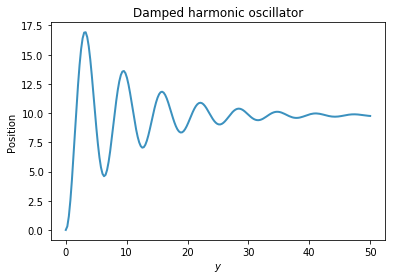

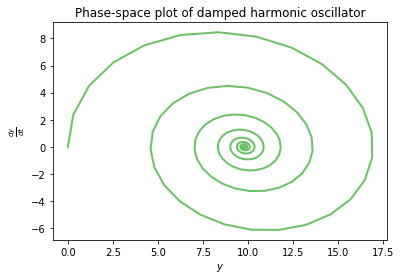

In [18]:
k = 1
m = 1
y0 = 0
c = 0.2
g = 9.81


def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    # Equations: my'' + cy' + ky - mg + y0 = 0
    # Set: z = y' = U[1] and y = U[0]
    # Then z' = y'' = -(c/m)z - (k/m)y + mg - y0
    return [U[1], -(c/m)*U[1] -(k/m)*U[0] + m*g - y0]
U0 = [y0, 0]
xs = np.linspace(0, 50, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]


yps = Us[:,1]

plt.figure()
plt.plot(xs,ys,color='#3B91BF',linewidth=2.0)
plt.xlabel(r'$y$')
plt.ylabel('Position')
plt.title('Damped harmonic oscillator');
plt.show()

plt.figure()
plt.plot(ys,yps,color='#6DC066',linewidth=2.0)
plt.xlabel(r'$y$')
plt.ylabel(r'$\frac{dy}{dt}$')
plt.title('Phase-space plot of damped harmonic oscillator');
plt.show()

In [19]:
def root_secant(f,a,b,tolerance=1.0e-6):
    dx = abs(b-a)
    while (dx > tolerance):
        if f(b)-f(a) == 0:
            return b
        x_temp = b - (f(b)*(b-a)*1.0)/(f(b)-f(a))
        a = b
        b = x_temp
        dx = abs(b-a)
    return b

root_secant(np.cos,0,np.pi)

1.5707963267948966

In [20]:
def int_simple(f,a,b,N=100):
    interval = (b-a)/N
    
    x = [a + interval*i for i in range(N+1)]
    fvalues = [f(value) for value in x]
    
    return interval*sum(fvalues[0:-1])

def int_trap(f,a,b,N=100):
    interval = (b-a)/N
    
    x = [a + interval*i for i in range(N+1)]
    fvalues = [f(value) for value in x]
    
    return interval*(sum(fvalues[1:-2]) + (fvalues[0] + fvalues[-1])/2)

def int_simpson(f, a, b, n):
    h=(b-a)/n
    k=0.0
    x=a + h
    for i in range(1,int(n/2) + 1):
        k += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(1,int(n/2)):
        k += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+k)

$$\int_{0}^{\frac{\pi}{2}} \!\, cos\,x \,dx$$

In [21]:
f = lambda x : np.cos(x)

print('The value of the integral using rectangle method is aprox: {:f}'.format(int_simple(f,0,np.pi/2,100)))
print('The value of the integral using trapezoid method is aprox: {:f}'.format(int_trap(f,0,np.pi/2,100)))
print('The value of the integral using Simpson method is aprox: {:f}'.format(int_simpson(f,0,np.pi/2,100)))

The value of the integral using rectangle method is aprox: 1.007833
The value of the integral using trapezoid method is aprox: 0.999733
The value of the integral using Simpson method is aprox: 1.000000


$$\int_{1}^{3} \!\, \frac{1}{x^{2}} \,dx$$

In [22]:
f = lambda x : 1/x**2

print('The value of the integral using rectangle method is aprox: {:f}'.format(int_simple(f,1,3,100)))
print('The value of the integral using trapezoid method is aprox: {:f}'.format(int_trap(f,1,3,100)))
print('The value of the integral using Simpson method is aprox: {:f}'.format(int_simpson(f,1,3,100)))

The value of the integral using rectangle method is aprox: 0.675620
The value of the integral using trapezoid method is aprox: 0.664479
The value of the integral using Simpson method is aprox: 0.666667


$$\int_{2}^{4} \!\, x^{2} + x + 1 \,dx$$

In [23]:
f = lambda x : x**2 + x + 1

print('The value of the integral using rectangle method is aprox: {:f}'.format(int_simple(f,2,4,100)))
print('The value of the integral using trapezoid method is aprox: {:f}'.format(int_trap(f,2,4,100)))
print('The value of the integral using Simpson method is aprox: {:f}'.format(int_simpson(f,2,4,100)))

The value of the integral using rectangle method is aprox: 26.526800
The value of the integral using trapezoid method is aprox: 26.250392
The value of the integral using Simpson method is aprox: 26.666667


$$\int_{0}^{6.9} \!\, cos\,(\frac{\pi}{2}x^{2}) \,dx$$

In [24]:
f = lambda x : np.cos((np.pi/2)*x**2)

print('The value of the integral using rectangle method is aprox: {:f}'.format(int_simple(f,0,6.9,100)))
print('The value of the integral using trapezoid method is aprox: {:f}'.format(int_trap(f,0,6.9,100)))
print('The value of the integral using Simpson method is aprox: {:f}'.format(int_simpson(f,0,6.9,100)))

The value of the integral using rectangle method is aprox: 0.484645
The value of the integral using trapezoid method is aprox: 0.513256
The value of the integral using Simpson method is aprox: 0.472178


In [25]:
def double_int_simple(f, a, b, c, d, N=100):
    hx = (b - a)/float(N)
    hy = (d - c)/float(N)
    I = 0
    for i in range(N):
        for j in range(N):
            xi = a + hx/2 + i*hx
            yj = c + hy/2 + j*hy
            I += hx*hy*f(xi, yj)
    return I

In [26]:
f = lambda x,y : np.sqrt(abs(1 - x**2 - y**2))

print('The value of the double integral using rectangle method is aprox: {:f}'.format(double_int_simple(f,-1,1,-1,1,100)))

The value of the double integral using rectangle method is aprox: 2.503508


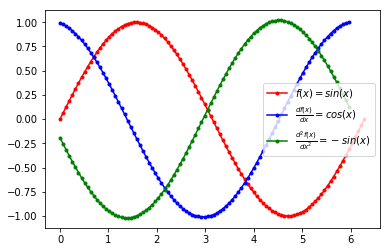

In [27]:
def deriv_simple(f,dx):        
    fp = [(1/(12*dx))*(f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2]) for i in range(3,len(f)-2)] # limite de la aproximacion de los 5 puntos para f'
    return fp

def dderiv_simple(f,dx):        
    fpp = [(1/(12*dx**2))*(-f[i-2]+16*f[i-1]-30*f[i]+16*f[i+1]-f[i+2]) for i in range(3,len(f)-2)] # limite de la aproximacion de los 5 puntos para f''
    return fpp

N = 100
a = 0
b = 2*np.pi
interval = (b-a)/float(N)

x = np.linspace(a,b,N)
FunctionValues = [np.sin(value) for value in x]

plt.plot(x,FunctionValues,'r.-',label=r'$f(x) = sin(x)$')

df = deriv_simple(FunctionValues , interval)
ddf = dderiv_simple(FunctionValues , interval)

plt.plot(x[0:len(df)],df,'b.-',label=r'$\frac{df(x)}{dx} = cos(x)$')
plt.plot(x[0:len(ddf)],ddf,'g.-',label=r'$\frac{d^{2}f(x)}{dx^{2}} = -sin(x)$')
plt.legend(loc='best')
plt.show()

Para el ejercicio este hay que hacer todo un desarrollo, ya que la integral queda dependiente de $\mu$, que es el valor que quiero calcular luego con el metodo de la secante; por lo tanto no puedo meterla en los metodos de integracion.

Quiero resolver la ecuación:

$$\int_{0}^{2} \!\, \frac{1}{e^{\frac{E-\mu}{kT}} + 1} \,dE = 1$$

Considero $kT \approx \frac{1}{40}$. Entonces lo que hice fue lo siguiente: por sustitucion, resolvi y deje la integral en funcion de $\mu$:

$$ v = \frac{E}{kT} - \frac{\mu}{kT} $$
$$ dv = \frac{dE}{kT} \Rightarrow kTdv = dE $$

Reescribo la integral:

$$\int_{0}^{2} \!\, \frac{1}{e^{\frac{E-\mu}{kT}} + 1} \,dE = \int_{\frac{-\mu}{kT}}^{\frac{2-\mu}{kT}} \!\, \frac{1}{e^{v} + 1} \,dv $$

Esta integral (por tabla) es:

$$\int_{\frac{-\mu}{kT}}^{\frac{2-\mu}{kT}} \!\, \frac{1}{e^{v} + 1} \,dv = kT [\frac{2-\mu}{kT} - ln |1+e^{\frac{2-\mu}{kT}}| + \frac{\mu}{kT} + ln |1+e^{\frac{-\mu}{kT}}|]$$

Para obtener la relacion de arriba, $$kT [\frac{2-\mu}{kT} - ln |1+e^{\frac{2-\mu}{kT}}| + \frac{\mu}{kT} + ln |1+e^{\frac{-\mu}{kT}}|] = 1$$

Por lo tanto, para hallar $\mu$, defino $$f(\mu) = kT [\frac{2-\mu}{kT} - ln |1+e^{\frac{2-\mu}{kT}}| + \frac{\mu}{kT} + ln |1+e^{\frac{-\mu}{kT}}|] - 1$$

Finalmente, busco la raiz de $f$ con el metodo de la secante definido mas arriba. El metodo da $\mu = 1$ para $E \in [0,2]$

In [28]:
kT = 1/40
fd = lambda mu: kT*((2-mu)/kT - np.log(abs(1+np.exp((2-mu)/kT))) + (mu)/kT + np.log(abs(1+np.exp((-mu)/kT)))) - 1

root_secant(fd,-1,1)

1.0

In [29]:
# Chequeo la parte de arriba con los metodos integrales usados mas arriba, la integral tiene que dar aprox 1 para mu = 1
mu = 1
kT = 1/40

g = lambda E: 1/(np.exp((E-mu)/kT)+1)

int_simpson(g,0,2,10000)

1.0000000000000424

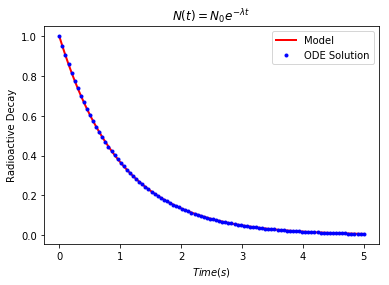

In [30]:
N0 = 1
lambda1 = 1

def dN_dx(N, t=0):
    g0 = -lambda1*N
    return g0

U0 = 1
ts = np.linspace(0, 5, 100)
Us = odeint(dN_dx, U0, ts)

ymodel = N0*np.exp(-lambda1*ts)

plt.figure()
plt.plot(ts,ymodel,'r-',linewidth=2.0,label='Model')
plt.plot(ts,Us,'b.',linewidth=1.0,label='ODE Solution')
plt.xlabel(r'$Time (s)$')
plt.ylabel('Radioactive Decay')
plt.title(r'$N(t) = N_{0}e^{-\lambda t}$');
plt.legend(loc='best')
plt.show()

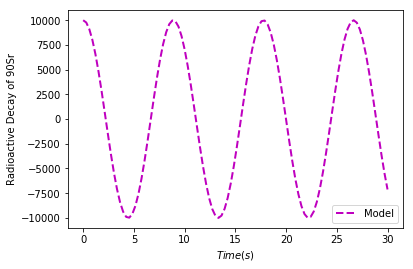

In [116]:
lambda1 = 0.5
lambda2 = 0.5

def dN_dt(y, t = 0):
    g0 = y[1]
    g1 = -lambda1 * y[0]
    g2 = y[3]
    g3 = -lambda2 * y[2] + lambda1 * y[0]
    return [g0,g1,g2,g3]

U0 = [10000,1,1,0.007]
ts = np.linspace(0,30,100)
Us = odeint(dN_dt, U0, ts)

plt.figure()
plt.plot(ts,Us[:,0],'m--',linewidth=2.0,label='Model')
plt.xlabel(r'$Time (s)$')
plt.ylabel('Radioactive Decay of 90Sr')
plt.legend(loc='best')
plt.show()


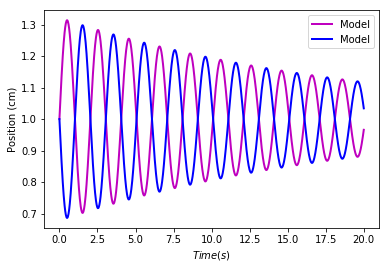

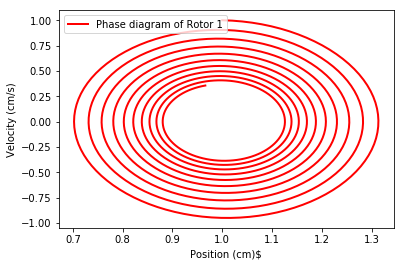

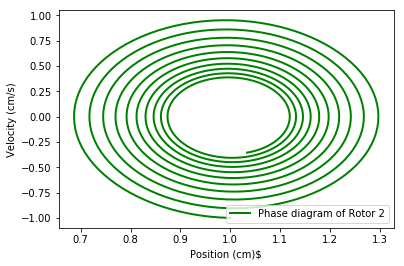

In [145]:
b = 0.1
beta = 5.0

def rotor_eqs(theta, t = 0):
    g0 = theta[1]
    g1 = beta * np.sin(theta[2] - theta[0]) - b * theta[1]
    g2 = theta[3]
    g3 = beta * np.sin(theta[0] - theta[2]) - b * theta[3]
    return [g0,g1,g2,g3]

U0 = [1,1,1,-1]
ts = np.linspace(0,20,1000)
Us = odeint(rotor_eqs, U0, ts)

plt.figure()
plt.plot(ts,Us[:,0],'m',linewidth=2.0,label='Model')
plt.plot(ts,Us[:,2],'b',linewidth=2.0,label='Model')
plt.xlabel(r'$Time (s)$')
plt.ylabel('Position (cm)')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(Us[:,0],Us[:,1],'r',linewidth=2.0,label='Phase diagram of Rotor 1')
plt.xlabel(r'Position (cm)$')
plt.ylabel('Velocity (cm/s)')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(Us[:,2],Us[:,3],'g',linewidth=2.0,label='Phase diagram of Rotor 2')
plt.xlabel(r'Position (cm)$')
plt.ylabel('Velocity (cm/s)')
plt.legend(loc='best')
plt.show()

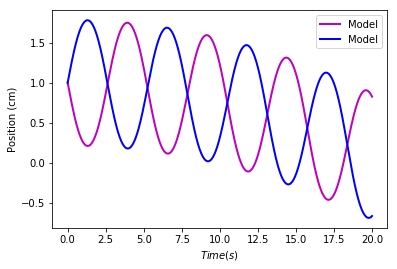

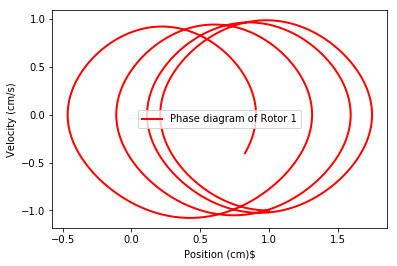

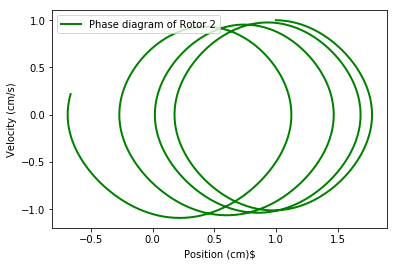

In [143]:
b = 0.01
beta = 1

def rotor_eqs(theta, t = 0):
    g0 = theta[1]
    g1 = beta * np.sin(theta[2] - theta[0]) - b * theta[1] * theta[1]
    g2 = theta[3]
    g3 = beta * np.sin(theta[0] - theta[2]) - b * theta[3] * theta[3]
    return [g0,g1,g2,g3]

U0 = [1,-1,1,1]
ts = np.linspace(0,20,1000)
Us = odeint(rotor_eqs, U0, ts)

plt.figure()
plt.plot(ts,Us[:,0],'m',linewidth=2.0,label='Model')
plt.plot(ts,Us[:,2],'b',linewidth=2.0,label='Model')
plt.xlabel(r'$Time (s)$')
plt.ylabel('Position (cm)')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(Us[:,0],Us[:,1],'r',linewidth=2.0,label='Phase diagram of Rotor 1')
plt.xlabel(r'Position (cm)$')
plt.ylabel('Velocity (cm/s)')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(Us[:,2],Us[:,3],'g',linewidth=2.0,label='Phase diagram of Rotor 2')
plt.xlabel(r'Position (cm)$')
plt.ylabel('Velocity (cm/s)')
plt.legend(loc='best')
plt.show()